### Data Manipulation in Python - CSV

Download the Guerry dataset, a collection of historical data used in support of Andre-Michel Guerry’s 1833 Essay on the Moral Statistics of France. The data set is hosted online in comma-separated values format (CSV) by the Rdatasets repository. We could download the file locally and then load it using read_csv.

The link for the dataset in CSV format: https://www.datavis.ca/gallery/guerry/guerry.csv

The link for the data dictionary: https://www.datavis.ca/gallery/guerry/guerrydat.html

- Load the dataset in Python

In [14]:
import pandas as pd

guerry = pd.read_csv("guerry.csv")

- Check the top few rows of the data

In [16]:
guerry

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890.0,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521.0,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925.0,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289.0,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174.0,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710.0,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402.0,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044.0,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516.0,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [8]:
guerry.shape

(86, 23)

- Check the data types as read by Python

In [19]:
guerry.dtypes

dept                 int64
Region              object
Department          object
Crime_pers           int64
Crime_prop         float64
Literacy             int64
Donations            int64
Infants              int64
Suicides             int64
MainCity            object
Wealth               int64
Commerce             int64
Clergy               int64
Crime_parents        int64
Infanticide          int64
Donation_clergy      int64
Lottery              int64
Desertion            int64
Instruction          int64
Prostitutes          int64
Distance           float64
Area                 int64
Pop1831            float64
dtype: object

- Check for missing values in the data (if any)

In [21]:
guerry.isnull().sum()

dept                0
Region              0
Department          0
Crime_pers          0
Crime_prop         12
Literacy            0
Donations           0
Infants             0
Suicides            0
MainCity           10
Wealth              0
Commerce            0
Clergy              0
Crime_parents       0
Infanticide         0
Donation_clergy     0
Lottery             0
Desertion           0
Instruction         0
Prostitutes         0
Distance            0
Area                0
Pop1831             0
dtype: int64

In [22]:
guerry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           86 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       74 non-null     float64
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         76 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

In [23]:
guerry['Region'].value_counts()

W    17
N    17
C    17
S    17
E    17
      1
Name: Region, dtype: int64

- Make a scatter plot of Lottery and the Literacy variable. What pattern do you observe?

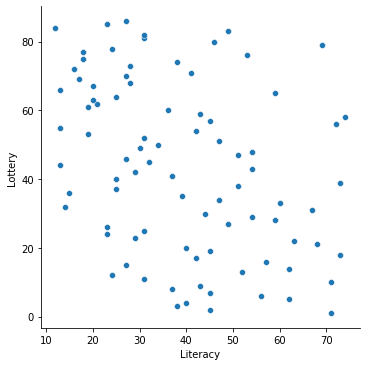

In [24]:
import seaborn as sns
sns.relplot(x = "Literacy", y = "Lottery", data = guerry, kind = "scatter")

- Make a table of Lottery with Region. In the table you should be able to view the average Lottery values against the different Region codes

In [25]:
guerry.groupby('Region')['Lottery'].mean()

Region
     83.000000
C    54.764706
E    36.058824
N    29.000000
S    49.000000
W    46.352941
Name: Lottery, dtype: float64

In [35]:
pd.pivot_table(data = guerry, values = ['Lottery', 'Literacy'], index = ['Region'], columns = ['MainCity'], aggfunc = {'Literacy': 'sum', 'Lottery': ['mean', 'median']})

Literacy               Lottery                                     
              sum                  mean                   median            
MainCity     1:Sm  2:Med   3:Lg    1:Sm      2:Med   3:Lg   1:Sm 2:Med  3:Lg
Region                                                                      
              NaN   49.0    NaN     NaN  83.000000    NaN    NaN  83.0   NaN
C            23.0  361.0    NaN    85.0  53.200000    NaN   85.0  53.0   NaN
E           246.0  491.0  107.0    70.0  28.222222   3.50   72.0  28.0   3.5
N             NaN  652.0  216.0     NaN  34.416667   8.25    NaN  30.5   8.0
S            72.0  278.0   38.0    77.0  51.222222   3.00   75.0  64.0   3.0
W            56.0  334.0   24.0    70.5  49.583333  12.00   70.5  46.0  12.0

- Plot the average lottery for different regions in a bar chat

<AxesSubplot:xlabel='Lottery', ylabel='Region'>

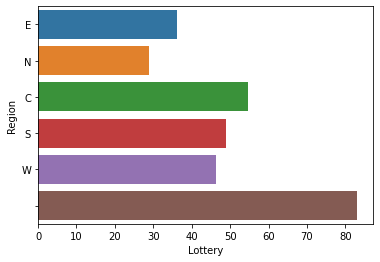

In [37]:
sns.barplot(y = 'Region', x = 'Lottery', data = guerry, ci = None)

In [42]:
sorted_guerry = guerry.groupby(['Region'])['Lottery'].mean().reset_index().sort_values('Lottery')
sorted_guerry

,Region,Lottery
3,N,29.000000
2,E,36.058824
5,W,46.352941
4,S,49.000000
1,C,54.764706
0,,83.000000


<AxesSubplot:xlabel='Lottery', ylabel='Region'>

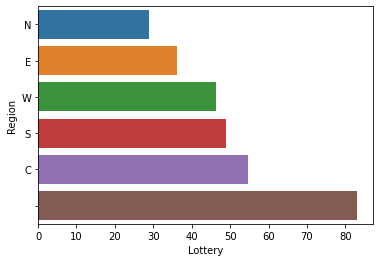

In [46]:
sns.barplot(y = 'Region', x = 'Lottery', data = sorted_guerry, ci = None)

- Summarize the region-wise donations

In [48]:
guerry.groupby('Region')['Donations'].mean()

Region
     37015.000000
C     7539.705882
E     4948.647059
N     7646.705882
S     3604.705882
W     9876.823529
Name: Donations, dtype: float64

### Data Manipulation in Python - JSON

The data for Nobel Laureates is provided in a JSON format. 

Link to the file: http://api.nobelprize.org/v1/prize.json

Convert the data for use in Python.

- Convert the nested JSON data into a pandas dataframe (You can use flatten_json library for flattening the file at once instead of using normalize)

In [53]:
nobel = pd.read_json("http://api.nobelprize.org/v1/prize.json")
nobel

,prizes
0,"{'year': '2020', 'category': 'chemistry', 'lau..."
1,"{'year': '2020', 'category': 'economics', 'lau..."
2,"{'year': '2020', 'category': 'literature', 'la..."
3,"{'year': '2020', 'category': 'peace', 'laureat..."
4,"{'year': '2020', 'category': 'physics', 'laure..."
...,...
647,"{'year': '1901', 'category': 'chemistry', 'lau..."
648,"{'year': '1901', 'category': 'literature', 'la..."
649,"{'year': '1901', 'category': 'peace', 'laureat..."
650,"{'year': '1901', 'category': 'physics', 'laure..."


In [51]:
nobel = pd.json_normalize(nobel['prizes'])
nobel

,year,category,laureates,overallMotivation
0,2020,chemistry,"[{'id': '991', 'firstname': 'Emmanuelle', 'sur...",NaN
1,2020,economics,"[{'id': '995', 'firstname': 'Paul', 'surname':...",NaN
2,2020,literature,"[{'id': '993', 'firstname': 'Louise', 'surname...",NaN
3,2020,peace,"[{'id': '994', 'motivation': '""for its efforts...",NaN
4,2020,physics,"[{'id': '988', 'firstname': 'Roger', 'surname'...",NaN
...,...,...,...,...
647,1901,chemistry,"[{'id': '160', 'firstname': 'Jacobus H.', 'sur...",NaN
648,1901,literature,"[{'id': '569', 'firstname': 'Sully', 'surname'...",NaN
649,1901,peace,"[{'id': '462', 'firstname': 'Henry', 'surname'...",NaN
650,1901,physics,"[{'id': '1', 'firstname': 'Wilhelm Conrad', 's...",NaN


In [ ]:
pip install flatten_json

In [59]:
from flatten_json import flatten

nobel = pd.read_json("http://api.nobelprize.org/v1/prize.json")
dict = (flatten(record) for record in nobel['prizes'])

In [60]:
nobel_df = pd.DataFrame(dict)
nobel_df

,year,category,laureates_0_id,laureates_0_firstname,laureates_0_surname,laureates_0_motivation,laureates_0_share,laureates_1_id,laureates_1_firstname,laureates_1_surname,laureates_1_motivation,laureates_1_share,laureates_2_id,laureates_2_firstname,laureates_2_surname,laureates_2_motivation,laureates_2_share,overallMotivation
0,2020,chemistry,991,Emmanuelle,Charpentier,"""for the development of a method for genome ed...",2,992,Jennifer A.,Doudna,"""for the development of a method for genome ed...",2,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,economics,995,Paul,Milgrom,"""for improvements to auction theory and invent...",2,996,Robert,Wilson,"""for improvements to auction theory and invent...",2,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,literature,993,Louise,Glück,"""for her unmistakable poetic voice that with a...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,peace,994,World Food Programme,NaN,"""for its efforts to combat hunger, for its con...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,physics,988,Roger,Penrose,"""for the discovery that black hole formation i...",2,989,Reinhard,Genzel,"""for the discovery of a supermassive compact o...",4,990,Andrea,Ghez,"""for the discovery of a supermassive compact o...",4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,1901,chemistry,160,Jacobus H.,van 't Hoff,"""in recognition of the extraordinary services ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,1901,literature,569,Sully,Prudhomme,"""in special recognition of his poetic composit...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
649,1901,peace,462,Henry,Dunant,"""for his humanitarian efforts to help wounded ...",2,463,Frédéric,Passy,"""for his lifelong work for international peace...",2,NaN,NaN,NaN,NaN,NaN,NaN
650,1901,physics,1,Wilhelm Conrad,Röntgen,"""in recognition of the extraordinary services ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Can you identify a problem with this type of a dataset? How many researchers receive Nobel prize for Economics in the year 2020 and list down their names?

In [65]:
nobel_df[(nobel_df['year'] == "2020") & (nobel_df['category'] == "economics")][['laureates_0_firstname', 'laureates_1_firstname']]

,laureates_0_firstname,laureates_1_firstname
1,Paul,Robert


In [78]:
nobel_long = nobel_df.melt(id_vars = ['year', 'category', 'overallMotivation'])
nobel_long[(nobel_long['year'] == "2001") & (nobel_long['category'] == "peace") & nobel_long.variable.str.contains('first')\
          & (nobel_long.value.notnull())]

,year,category,overallMotivation,variable,value
769,2001,peace,NaN,laureates_0_firstname,United Nations
4029,2001,peace,NaN,laureates_1_firstname,Kofi


### Cleaning, merging and analyzing business data with Python - Multiple CSV

ABC Bank has provided us with a dataset that contains customer details for their customers in `BankAttrition - Details.csv` file. The transactions related information and what kind of credit card the customer holds is provided to us in another file `Transaction and Card Details.csv`. The bank is currently facing problems of customer attrition. They have consulted us to understand how can they understand the patterns of customer attrition and if they can get early signals so to stop losing customers.

- Import the files and create an ADS (Analytical Dataset) and check for missing values

In [2]:
import pandas as pd
import numpy as np

details = pd.read_csv("Datasets/BankAttrition - Details.csv")
transaction = pd.read_csv("Datasets/Transaction and Card Details.csv")

details.shape, transaction.shape

((10127, 8), (10127, 14))

In [3]:
ads = pd.merge(details, transaction, how = 'outer', on = ['CLIENTNUM'])

ads.shape

(10127, 21)

In [81]:
ads.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


- Convert the variables into relevant data types

In [82]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
ads['CLIENTNUM'] = ads['CLIENTNUM'].astype('category')
ads['Attrition_Flag'] = ads['Attrition_Flag'].astype('category')
ads['Gender'] = ads['Gender'].astype('category')

ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

- Check for missing values (if any)

In [84]:
ads['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

- Check which variables have outliers

<AxesSubplot:xlabel='Total_Trans_Amt'>

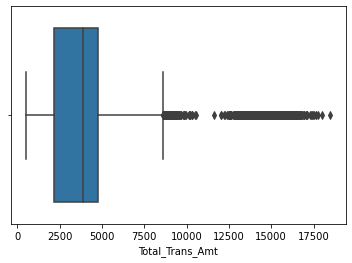

In [87]:
sns.boxplot(data = ads, x = 'Total_Trans_Amt')

- Keep only those rows that fall 5 percentile and 95 percentile of observations of `Total Revolving Balance`

In [94]:
import numpy as np

perc_05 = np.percentile(ads['Total_Trans_Amt'], 5)
perc_95 = np.percentile(ads['Total_Trans_Amt'], 95)

ads_cleaned = ads[(ads['Total_Trans_Amt'] > perc_05) & (ads['Total_Trans_Amt'] < perc_95)]

<AxesSubplot:xlabel='Total_Trans_Amt'>

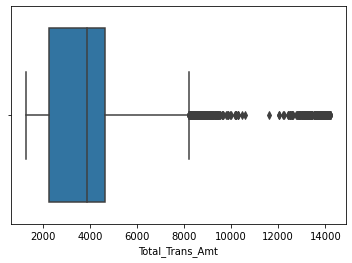

In [95]:
sns.boxplot(data = ads_cleaned, x = 'Total_Trans_Amt')

- After cleaning the dataset, do you still observe outliers in the `Avg_Open_to_Buy` variable?

In [ ]:
## your code goes here - insert more code blocks if required

- Subset the dataset to select only those customers who hold a Platinum card and are married females. Show only those columns that are of numeric datatype

In [97]:
ads[(ads['Card_Category'] == "Platinum") & (ads['Gender'] == "F") & 
    (ads['Marital_Status'] == "Married")].select_dtypes(include = ['int64', 'float64'])

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3800,51,2,42,3,2,3,15987.0,193,15794.0,0.435,2021,46,0.394,0.012


- Create bins for the `Age` variable using the following definition:

$0-18$ years - Minor

$18-30$ years - Adult

$30-50$ years - Middle aged

$50$ and above - Old

In [98]:
bins= [0, 18, 30, 50, 200]
labels = ['Minor','Adult','Middle_Aged','Old']

ads['AgeGroup'] = pd.cut(ads['Customer_Age'], bins = bins, labels = labels, right = True)
ads['AgeGroup'].value_counts()

Middle_Aged    6784
Old            3078
Adult           265
Minor             0
Name: AgeGroup, dtype: int64

- `Education` variable in the dataset contains a lot of Unknown values. Replace those values as missing. Use the mode of Education for each Gender and Age bracket to replace those missing values.  

In [100]:
ads['Education_Level'].replace('Unknown', np.nan, inplace = True)
ads

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,AgeGroup
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,Middle_Aged
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,Middle_Aged
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,Old
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,Middle_Aged
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,Middle_Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,Middle_Aged
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,Middle_Aged
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,Middle_Aged
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,Adult


In [101]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           8608 non-null   object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

- Convert the `Education` variable into lower cases 

In [102]:
ads['Education_Level'].str.lower()

0        high school
1           graduate
2           graduate
3        high school
4         uneducated
            ...     
10122       graduate
10123            NaN
10124    high school
10125       graduate
10126       graduate
Name: Education_Level, Length: 10127, dtype: object

- Label encode the various levels of income into a numeric variable

In [1]:
## your code goes here - insert more code blocks if required

- Convert the categorical variables into numerical dummy variables using the `get_dummies` function and save it as a separate dataset

In [ ]:
## your code goes here - insert more code blocks if required

- Generate hypotheses related to the problem statement at hand

## Perform an end-to-end Exploratory Data Analysis with the dataset provided to us

In [5]:
import pandas as pd
import numpy as np

details = pd.read_csv("Datasets/BankAttrition - Details.csv")
transaction = pd.read_csv("Datasets/Transaction and Card Details.csv")

details.shape, transaction.shape

ads = pd.merge(details, transaction, how = 'outer', on = ['CLIENTNUM'])

ads.shape

(10127, 21)

In [2]:
ads.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [6]:
ads['CLIENTNUM'] = ads['CLIENTNUM'].astype('category')
ads['Attrition_Flag'] = ads['Attrition_Flag'].astype('category')
ads['Gender'] = ads['Gender'].astype('category')
ads['Marital_Status'] = ads['Marital_Status'].astype('category')
ads['Income_Category'] = ads['Income_Category'].astype('category')
ads['Card_Category'] = ads['Card_Category'].astype('category')

In [4]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  category
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [7]:
# selecting numerical vars

num_vars = ads.select_dtypes(include = ['int64', 'float64'])

In [7]:
num_vars

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
for i in num_vars.columns:
    print(f'range of {i}:[{ads[i].min()}, {ads[i].max()}]')

range of Customer_Age:[26, 73]
range of Dependent_count:[0, 5]
range of Months_on_book:[13, 56]
range of Total_Relationship_Count:[1, 6]
range of Months_Inactive_12_mon:[0, 6]
range of Contacts_Count_12_mon:[0, 6]
range of Credit_Limit:[1438.3, 34516.0]
range of Total_Revolving_Bal:[0, 2517]
range of Avg_Open_To_Buy:[3.0, 34516.0]
range of Total_Amt_Chng_Q4_Q1:[0.0, 3.397]
range of Total_Trans_Amt:[510, 18484]
range of Total_Trans_Ct:[10, 139]
range of Total_Ct_Chng_Q4_Q1:[0.0, 3.714]
range of Avg_Utilization_Ratio:[0.0, 0.9990000000000001]


In [9]:
num_vars.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


<AxesSubplot:xlabel='Customer_Age', ylabel='Count'>

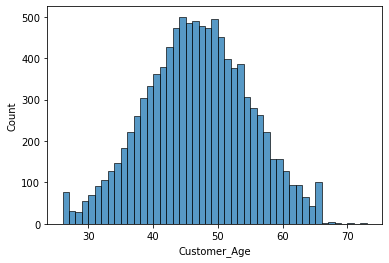

In [12]:
import seaborn as sns

sns.histplot(num_vars["Customer_Age"], binwidth = 1)

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

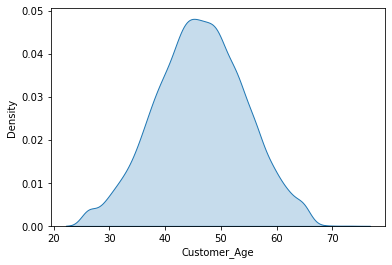

In [14]:
sns.kdeplot(num_vars["Customer_Age"], shade = True)

In [21]:
num_vars["Customer_Age"].skew(), num_vars["Customer_Age"].kurtosis()

(-0.033605016317173456, -0.2886199152745088)

(2.0640305679077477, 15.689292901407043)

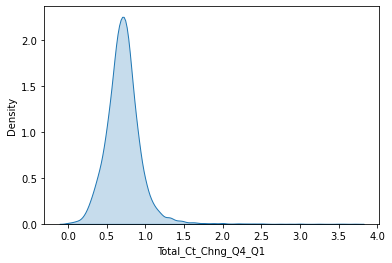

In [19]:
sns.kdeplot(num_vars["Total_Ct_Chng_Q4_Q1"], shade = True)
num_vars["Total_Ct_Chng_Q4_Q1"].skew(), num_vars["Total_Ct_Chng_Q4_Q1"].kurtosis()

(-0.020825535616339912, -0.6830166530893709)

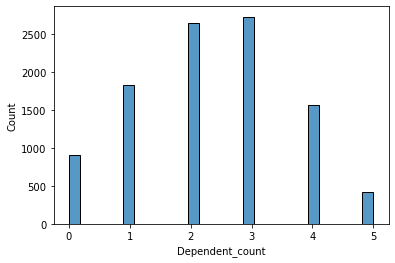

In [23]:
sns.histplot(num_vars["Dependent_count"])
num_vars["Dependent_count"].skew(), num_vars["Dependent_count"].kurtosis()

In [32]:
import matplotlib.pyplot as plt

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

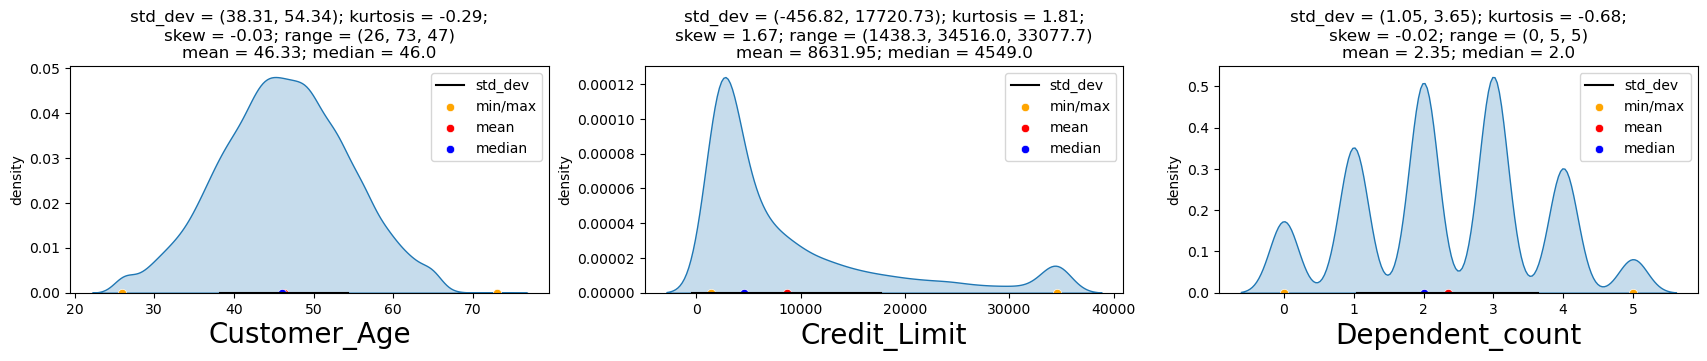

In [33]:
UVA_numeric(num_vars, ['Customer_Age', 'Credit_Limit', 'Dependent_count'])

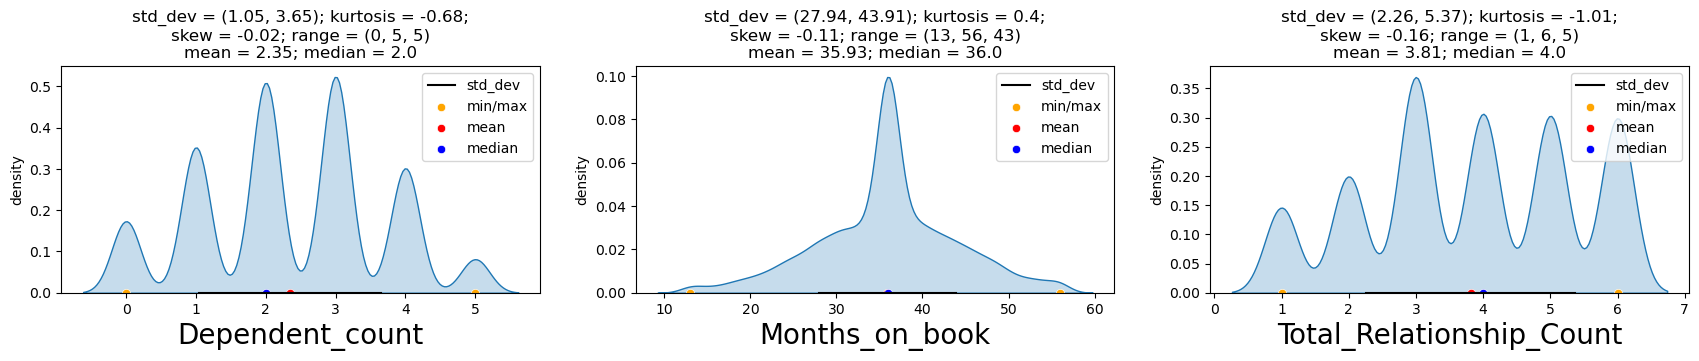

In [34]:
UVA_numeric(num_vars, num_vars.columns[1:4])

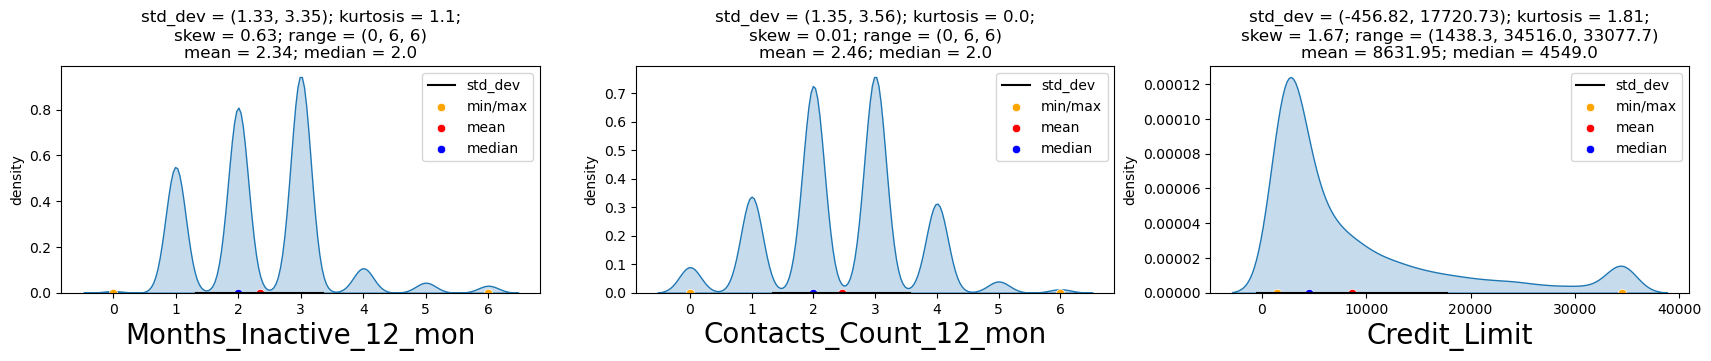

In [35]:
UVA_numeric(num_vars, num_vars.columns[4:7])

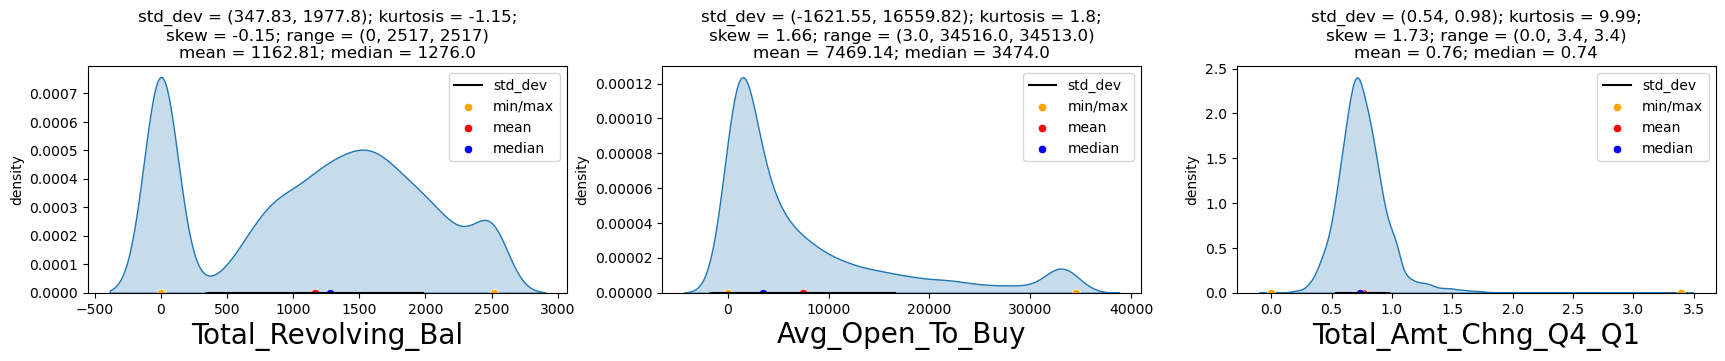

In [37]:
UVA_numeric(num_vars, num_vars.columns[7:10])

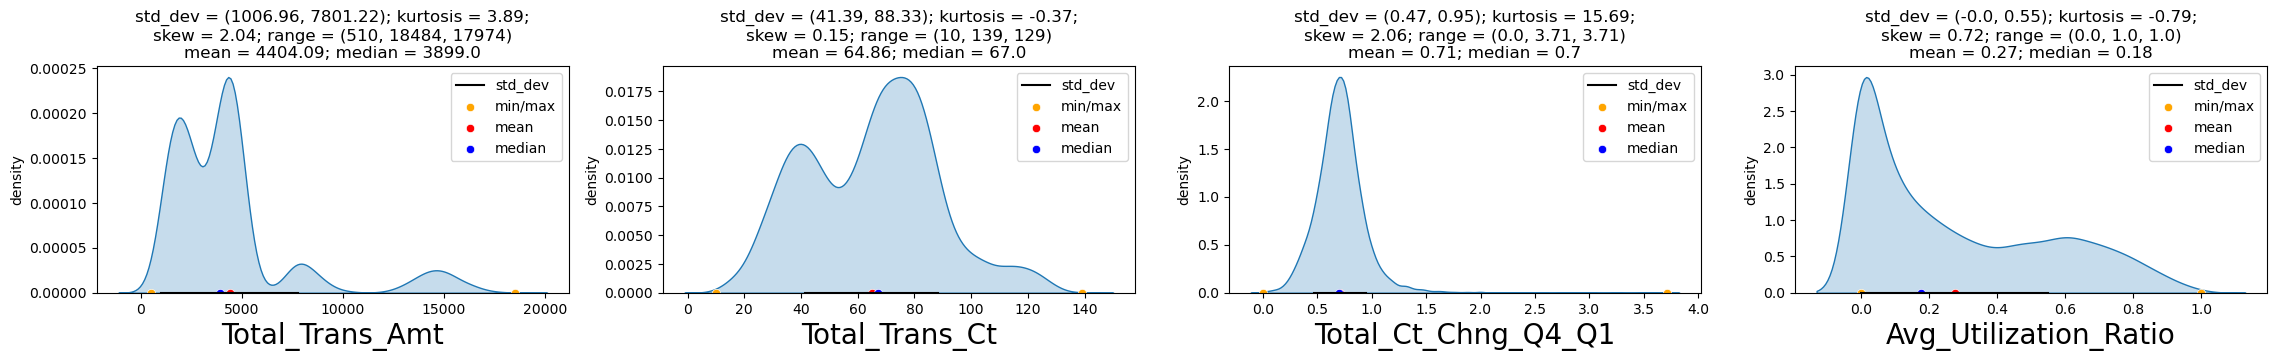

In [38]:
UVA_numeric(num_vars, num_vars.columns[10:])

<AxesSubplot:xlabel='Total_Amt_Chng_Q4_Q1'>

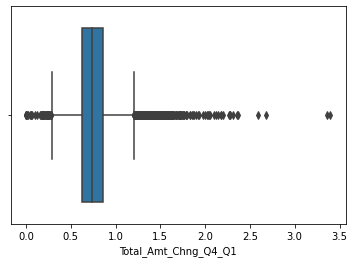

In [39]:
sns.boxplot(data = num_vars, x = 'Total_Amt_Chng_Q4_Q1')

<AxesSubplot:ylabel='Gender'>

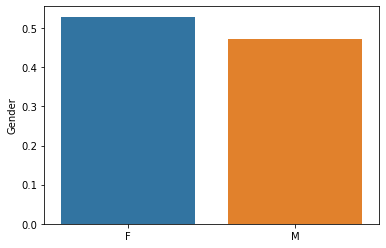

In [40]:
count_gender = ads['Gender'].value_counts(normalize = True)
sns.barplot(y = count_gender, x= count_gender.index)

<AxesSubplot:>

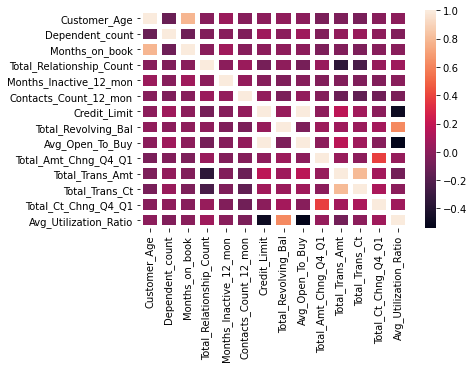

In [57]:
correlation = num_vars.corr(method = 'pearson')
sns.heatmap(correlation, linewidth = 4)

In [58]:
correlation

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


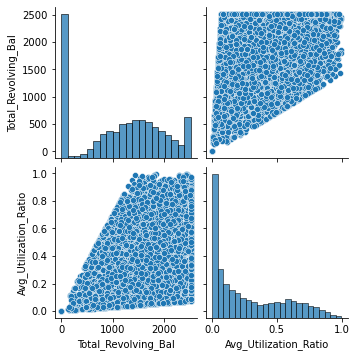

In [56]:
sns.pairplot(data = ads, vars = ['Total_Revolving_Bal', 'Avg_Utilization_Ratio'])

In [63]:
ads.groupby(['Attrition_Flag'])['Avg_Utilization_Ratio'].mean()

Attrition_Flag
Attrited Customer    0.162475
Existing Customer    0.296412
Name: Avg_Utilization_Ratio, dtype: float64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

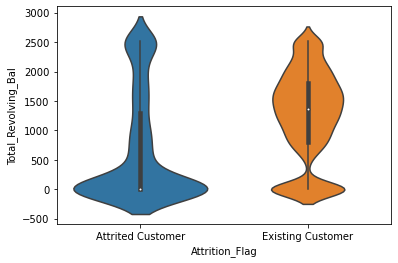

In [72]:
sns.violinplot(x = 'Attrition_Flag', y = 'Total_Revolving_Bal', data = ads)

- Customers > 70 they do not attrite

In [13]:
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = ((X1 - X2) - 0)/ovr_sigma # null hypothesis (there is no difference)
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

C:\Users\Kaushik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


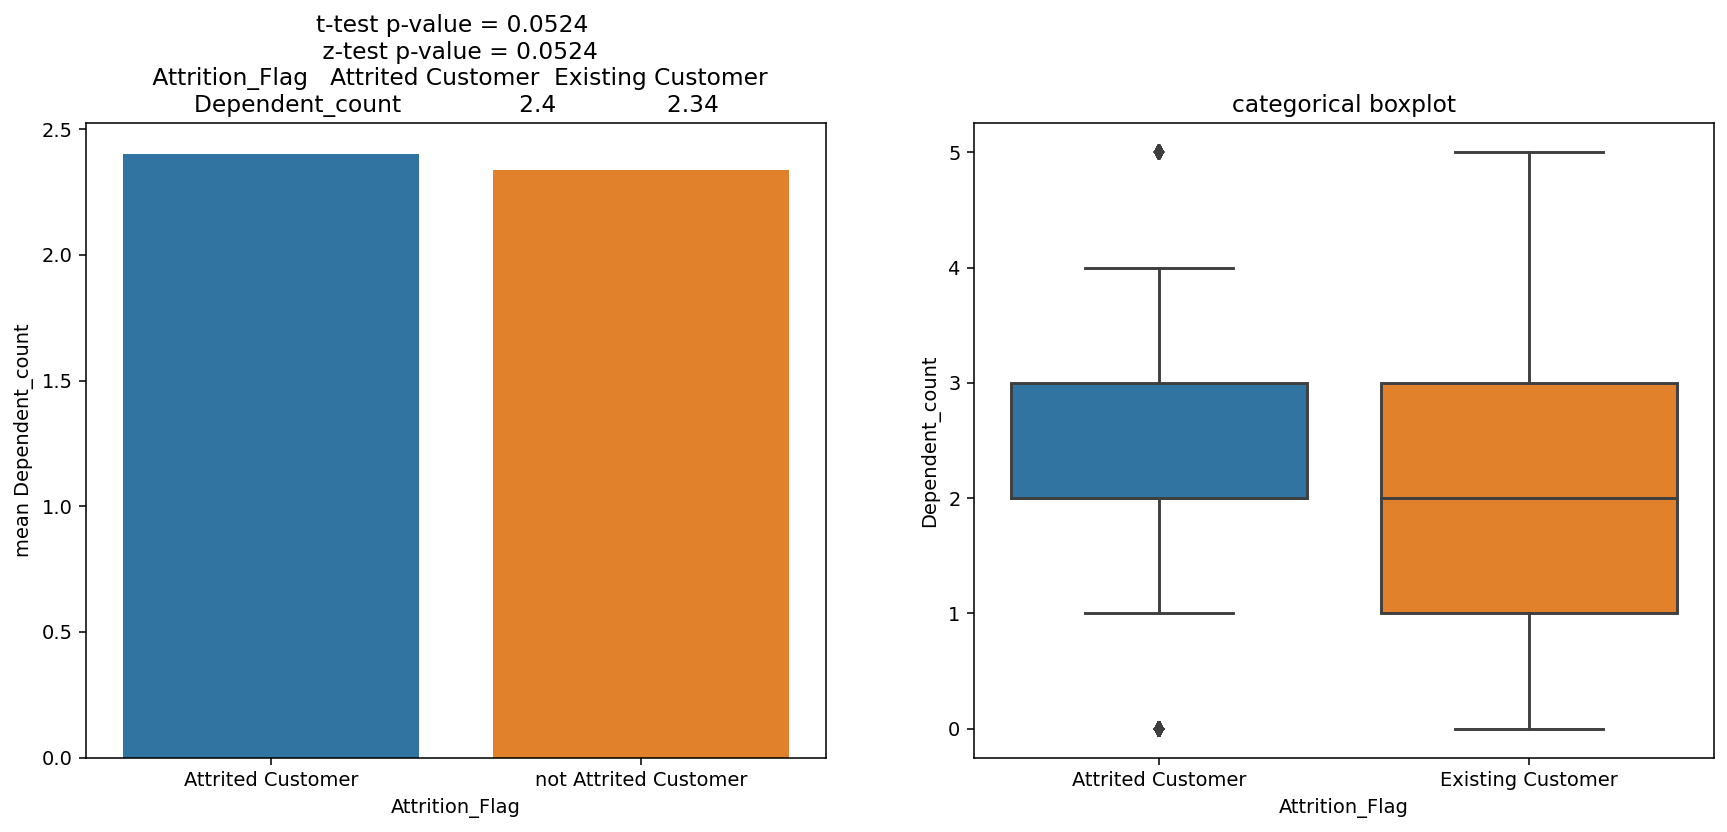

In [19]:
Bivariate_cont_cat(ads, 'Dependent_count', 'Attrition_Flag', 'Attrited Customer')

In [1]:
from scipy.stats import chi2_contingency

def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

#   return table, f_obs, chi2_contingency(f_obs)
  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

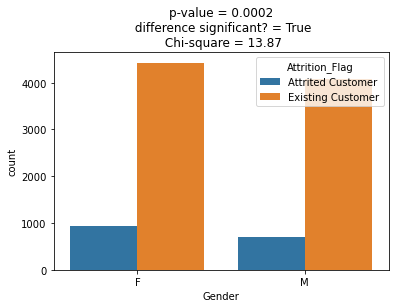

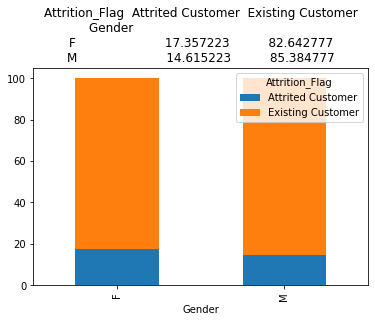

In [40]:
BVA_categorical_plot(ads, 'Attrition_Flag', 'Gender')